In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import predict 

In [2]:
dataset = pd.read_csv('data.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [3]:
def normalize(x):
    x_min = x.min()
    x_max = x.max()
    x_normalized = (x - x_min) / (x_max - x_min)
    return x_normalized

def standardize(x):
    x_mean = np.mean(x)
    x_std = np.std(x)
    x_stand = (x - x_mean) / x_std
    return x_stand
xi = x
yi = y

#x = normalize(x)

x = standardize(x)
y = standardize(y)

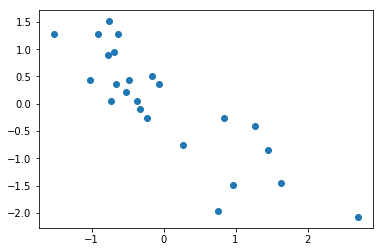

In [4]:
plt.scatter(x, y)

In [5]:
y = y.reshape(y.shape[0],1)

In [6]:
X = np.hstack((x, np.ones(x.shape)))
X.shape

(24, 2)

In [7]:
theta = predict.get_params()
print(theta)


[[ -2.77092487e+01]
 [  1.09867002e+07]]


In [8]:
def model(X, theta):
    return X.dot(theta)

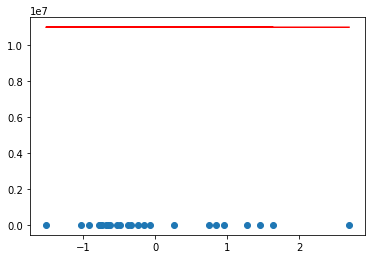

In [9]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

In [10]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [11]:
cost_function(X, y, theta)

60353790383475.352

In [12]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [13]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [14]:
learning_rate=0.01
n_iterations=28500
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

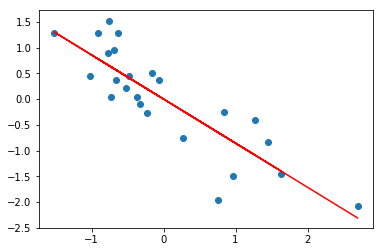

In [15]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

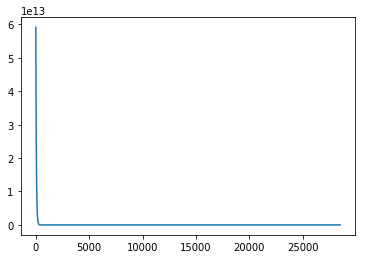

In [16]:
plt.plot(range(n_iterations), cost_history)

In [17]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [18]:
coef_determination(y, predictions)

0.73297470783149654

In [19]:
def MoindreCarre(x, y):
    x_sum = 0.
    x2_sum = 0.
    y_sum = 0.
    xy_sum = 0.
    
    for xi, yi in zip(x, y):
        x_sum += xi
        x2_sum += xi**2
        y_sum += yi
        xy_sum += xi * yi
        
    npoints = len(x)
    a = (npoints * xy_sum - x_sum * y_sum) / (npoints * x2_sum - x_sum**2)
    b = (x2_sum * y_sum - x_sum * xy_sum) / (npoints * x2_sum - x_sum**2)
    return a, b

In [20]:
a, b = MoindreCarre(x, y)

In [21]:
print("Valeur de theta[0] avec la methode des moindres carre: ", a)
print("Valeur de theta[1] avec la methode des moindres carre: ", b)

Valeur de theta[0] avec la methode des moindres carre:  [-0.85613942]
Valeur de theta[1] avec la methode des moindres carre:  [  1.55983110e-16]


In [22]:
theta_final

array([[ -8.56139421e-01],
       [  2.77631461e-16]])

In [23]:
y_mean = np.mean(yi)
x_mean = np.mean(xi)
y_std = np.std(yi)
x_std = np.std(xi)

a = theta_final[0]
b = theta_final[1]

In [24]:
a_destand = (y_std * a) / x_std
div = (a * x_mean) / x_std
b_destand = y_mean + (y_std * (b - div))

In [25]:
def save_theta(a, b):
    with open('params.txt', 'w') as file:
        thetas = file.write(f'{a} \n{b}')

In [27]:
save_theta(float(a_destand), floatb_destand)